In [1]:
#1. Created notebook

In [3]:
#2. Change for generators as in documentation
import numpy as np

uniform1 = np.random.uniform(0,1,1000)
normal1 = np.random.normal(0,1,1000)
normal_dev10 = np.random.normal(0,10,1000)

beta1 = np.random.beta(1,1,1000)
beta2 = np.random.beta(2,2,1000)
beta3 = np.random.beta(3,9,1000)

normal2d_1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 10000)
normal2d_2 = np.random.multivariate_normal([0,0], [[2,1],[1,2]], 10000)

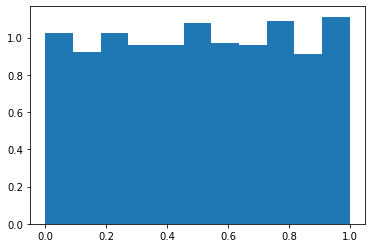

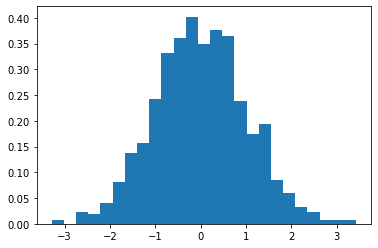

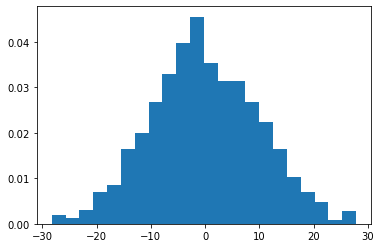

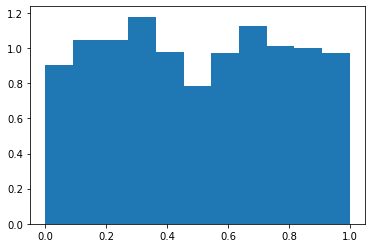

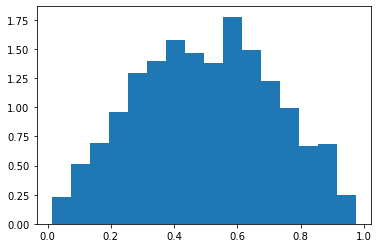

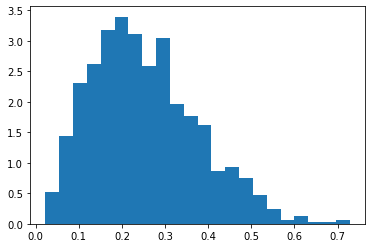

In [10]:
#3. Plotting histograms for 1d distribution
import matplotlib.pyplot as plt

# compared with uniform distribution plot written analytically all bins should be at the same height (they should have the same probability density function)
plt.hist(uniform1, bins='auto', density=True)
plt.show()

# compared 
plt.hist(normal1, bins='auto', density=True)
plt.show()
plt.hist(normal_dev10, bins='auto', density=True)
plt.show()
plt.hist(beta1, bins='auto', density=True)
plt.show()
plt.hist(beta2, bins='auto', density=True)
plt.show()
plt.hist(beta3, bins='auto', density=True)
plt.show()

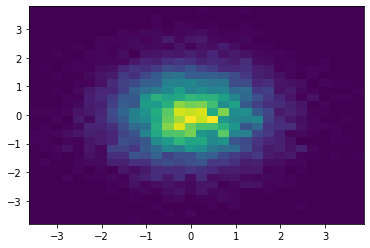

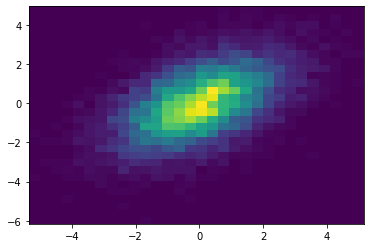

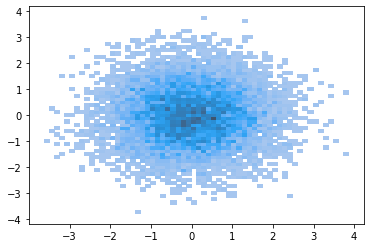

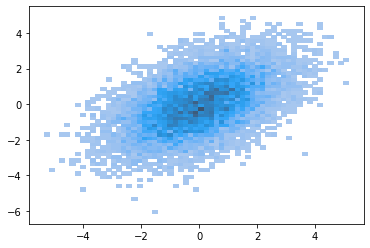

In [32]:
#4. Plotted 2d distributions
 
# not enough bins (less than 10) will make plot 'low resolution' and it wont visualize shape of the distribution properly
# too much bins (more than 150) will make the plot 'sparse' and likewise wont visualize shape of the distribution properly
plt.hist2d(x=normal2d_1[:,0], y=normal2d_1[:,1], bins=30, density=True)
plt.show()

plt.hist2d(x=normal2d_2[:,0], y=normal2d_2[:,1], bins=30, density=True)
plt.show()

#comparison of the plots with seaborn. Seaborn has more customization options, also it allows for automatic bins detection.
#TODO: write some more stuff
import seaborn as sb

sb.histplot(data=normal2d_1, x=normal2d_1[:,0], y=normal2d_1[:,1])
plt.show()
sb.histplot(data=normal2d_1, x=normal2d_2[:,0], y=normal2d_2[:,1])
plt.show()

In [58]:
#5. Generated points
alpha = np.random.normal(2, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0, 3, 1000)
sigma = np.abs(np.random.normal(0, 1, 1000))

mi = alpha + beta*x
y = np.random.normal(mi, sigma, 1000)

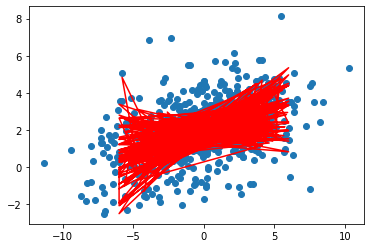

In [59]:
#6. Plotting the above
plt.scatter(x,y)
new_x = np.clip(x, -6,6)
plt.plot(new_x,mi, 'red')